Imported libraries

In [1]:
import pandas as pd

# For Data
from Data.historical_data import Historical_data
from alpaca.data.timeframe import TimeFrame
from alpaca.data.historical import CryptoHistoricalDataClient, StockHistoricalDataClient

# For preprocessing
from Preprocessing.preprocessing import Preprocessing

# For model
from Models.LSTM.lstm import LSTM

# For training and evaluation
from Evaluation.evaluation import Evaluator_LSTM
import time
import matplotlib.pyplot as plt

Data and Preprocessing

In [2]:
s_type = "StockBars"
stock = ["AAPL"]
timeframe = TimeFrame.Hour
start = "2021-08-19 06:00:00"
end = "2022-08-20 06:00:00"
client = StockHistoricalDataClient("PKV7BABG3DGE0GYL137W", "af1eQghpVgbyX2lh2T9n2ColmVYXHCWndQbKR3Lr")
save_csv = False

df = Historical_data(s_type = s_type, stock = stock, timeframe = timeframe, start = start, end = end, client = client, save_csv = save_csv)
df_tuple = Preprocessing(df)

Create model

In [3]:
input_size = 7 #number of features
hidden_size = 2 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers
num_classes = 1 #number of output classes 

lstm_1 = LSTM(input_size, hidden_size, num_layers, df_tuple[0].shape[1]) #our lstm class 

input_size = 7 #number of features
hidden_size = 4 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers
num_classes = 1 #number of output classes 

lstm_2 = LSTM(input_size, hidden_size, num_layers, df_tuple[0].shape[1]) #our lstm class 

input_size = 7 #number of features
hidden_size = 8 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers
num_classes = 1 #number of output classes 

lstm_3 = LSTM(input_size, hidden_size, num_layers, df_tuple[0].shape[1]) #our lstm class 

models = [lstm_1, lstm_2, lstm_3]

Train and Evaluate Model

Epoch 0, Loss: 0.6111026406288147
Epoch 100, Loss: 0.46322953701019287
Epoch 200, Loss: 0.4628785252571106
Epoch 300, Loss: 0.4623017907142639
Epoch 400, Loss: 0.4596399962902069
Epoch 500, Loss: 0.4399251341819763
Epoch 600, Loss: 0.3624681234359741
Epoch 700, Loss: 0.27370262145996094
Epoch 800, Loss: 0.26278674602508545
Epoch 900, Loss: 0.2563253343105316
Accuracy: 0.7317073345184326


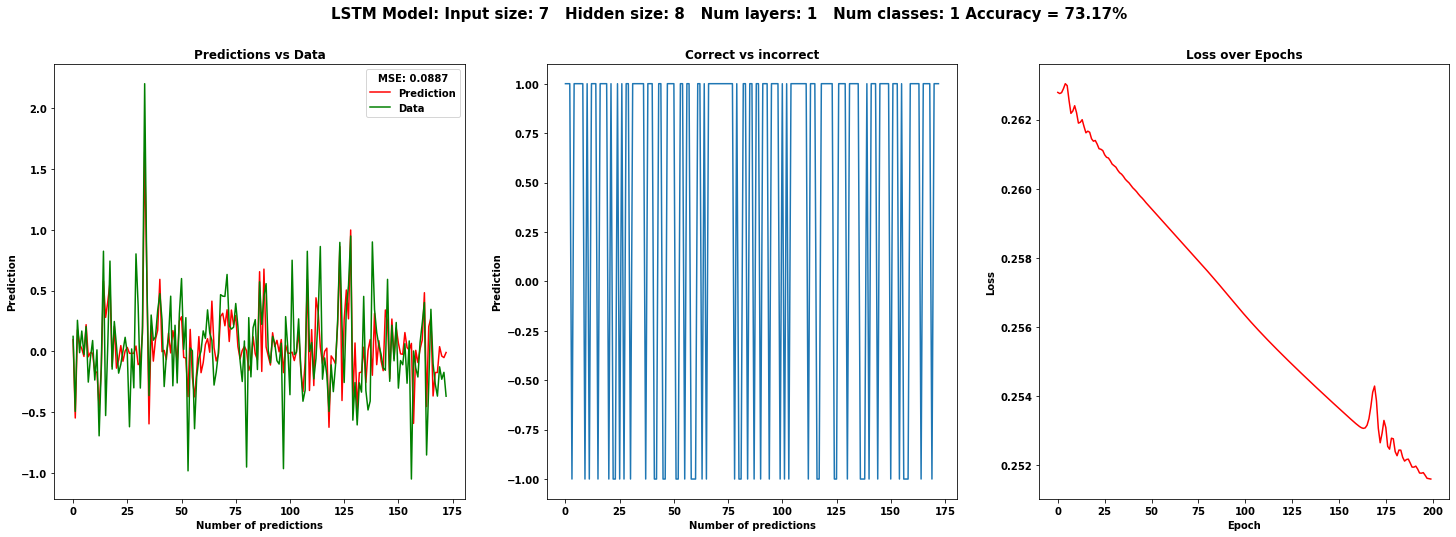

Epoch 0, Loss: 0.6635400652885437
Epoch 100, Loss: 0.4597715735435486
Epoch 200, Loss: 0.3750669062137604
Epoch 300, Loss: 0.27860188484191895
Epoch 400, Loss: 0.2630480229854584
Epoch 500, Loss: 0.2540443539619446
Epoch 600, Loss: 0.24894623458385468
Epoch 700, Loss: 0.24618197977542877
Epoch 800, Loss: 0.24445854127407074
Epoch 900, Loss: 0.24313142895698547
Accuracy: 0.7084785103797913


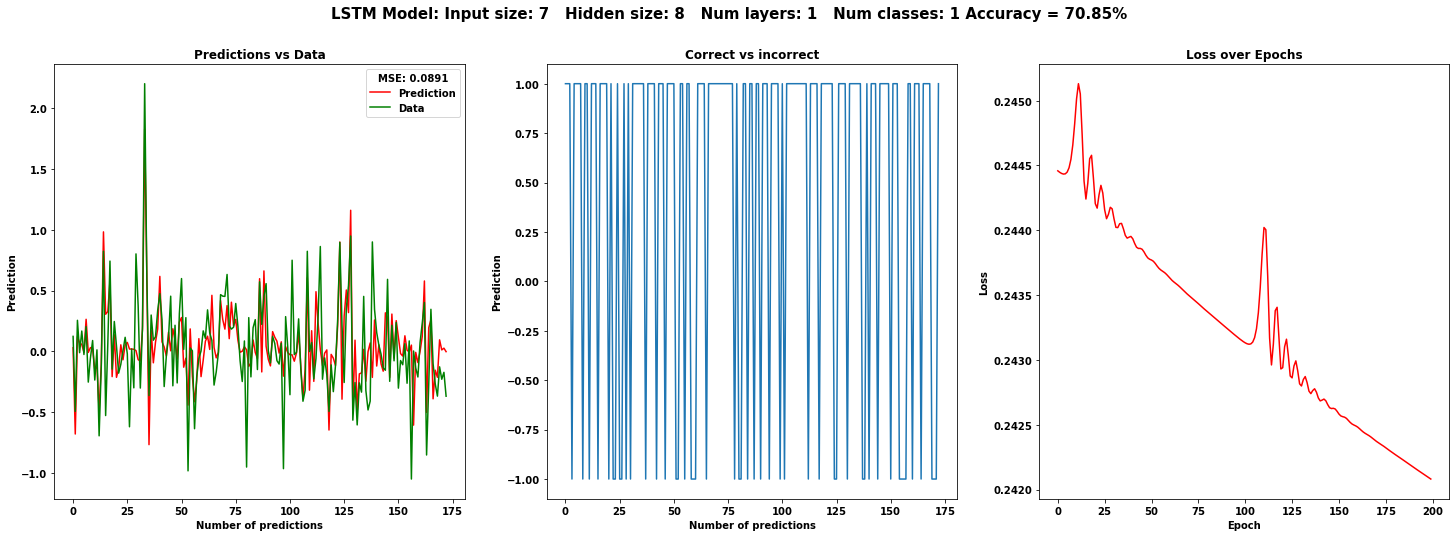

Epoch 0, Loss: 0.5141496658325195
Epoch 100, Loss: 0.3737122416496277
Epoch 200, Loss: 0.26821601390838623
Epoch 300, Loss: 0.25661033391952515
Epoch 400, Loss: 0.2508236765861511
Epoch 500, Loss: 0.24508318305015564
Epoch 600, Loss: 0.24202312529087067
Epoch 700, Loss: 0.23996998369693756
Epoch 800, Loss: 0.23839733004570007
Epoch 900, Loss: 0.23723579943180084
Accuracy: 0.7177700400352478


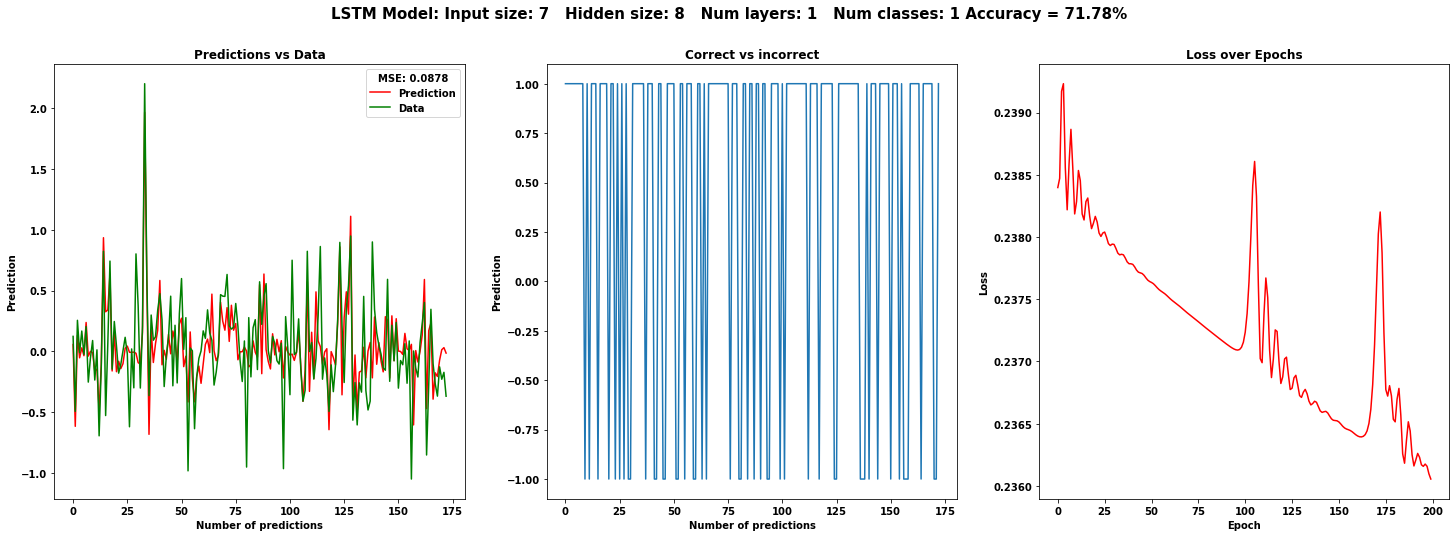

,Model,Loss,Time
0,model_1,0.251594,8.146551
1,model_2,0.242081,5.565228
2,model_3,0.236055,6.146311


In [4]:
model_text = 'Input size: ' + str(input_size) + '   Hidden size: ' + str(hidden_size) + '   Num layers: ' + str(num_layers) + '   Num classes: ' + str(num_classes)
num_epochs = 1000 #1000 epochs
learning_rate = 0.01 #0.001 lr

loss_list = []
time_list = []
for model in models:
    start_time = time.time()
    loss = Evaluator_LSTM(model = model, data = df_tuple, learning_rate = learning_rate , num_epochs = num_epochs, visualize = True, model_text = model_text)
    end_time = time.time()
    time_list.append(end_time - start_time)
    loss_list.append(loss)

model_names = ["model_1", "model_2", "model_3"]
df = pd.DataFrame({"Model": model_names, "Loss": loss_list, "Time": time_list})
df
